<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [ ]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

# Test Environment


## Importing the Dataset

You can begin by using the Generative AI model to create a python script that can load the dataset to a pandas dataframe. The dataset file already has the headers in the first row.

Write the prompt to generate the said code and test it in the JupyterLite environment. For verification of appropriate loading, include a step for printing the first 5 values of the loaded dataframe.

´´´
Write a Python code that can perform the following tasks.
1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
2. Print the first 5 rows of the dataframe to verify correct loading.
´´´

In [10]:
import pandas as pd

df = pd.read_csv("dataset.csv")

print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


## Data Cleaning
At this stage, it is required to clean up the data. As has been informed to you, the data may have missing values and duplicate entries. Write a prompt that performs the following tasks

Identifies the columns with missing values and fills the blank cells with average value of the columns.
Identifies and drops the duplicate entries from the data.

```
Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.
```

In [12]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

for column in columns_with_missing_values:
    df[column].fillna(df[column].mean(), inplace=True)

# 3. Remove duplicate entries
df.drop_duplicates(inplace=True)

# Show the cleaned DataFrame
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


### Data Augmentation (optional)
Once cleaned, you may choose to augment this dataset with additional samples, created synthetically using Mostly.ai.

## Data Insights and Visualization
Write prompts that generate codes to prform the following actions.

1. Identify the 5 attributes that have the highest correlation with the price parameter.

> Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

In [14]:
# Select only the numeric columns for correlation computation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Get the correlation of all numeric features with the target variable 'price'
correlation_with_price = correlation_matrix['price']

# Sort the correlation values in descending order (absolute values)
sorted_correlation = correlation_with_price.abs().sort_values(ascending=False)

# Get the top 5 attributes with the highest correlation to 'price' (excluding 'price' itself)
top_5_correlated_attributes = sorted_correlation[1:6]

# Display the top 5 correlated attributes
print("Top 5 attributes with the highest correlation to 'price':")
print(top_5_correlated_attributes)


Top 5 attributes with the highest correlation to 'price':
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


2. Count the number of cars under each unique value of fuelType attribute.
> Write a python code that counts the number of entries in a dataframe with each unique value of a specific attribute.

In [15]:
# Count the number of entries for each unique value in the 'fuelType' column
fuel_type_counts = df['fuelType'].value_counts()

# Display the count of each unique value in the 'fuelType' column
print(fuel_type_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.
> Write a python code that creates a Seaborn box plot between a source and target attributes of a dataframe.


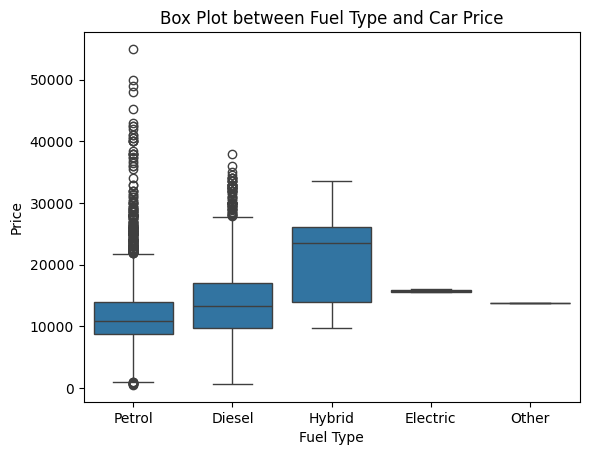

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='fuelType', y='price', data=df)

# Add title and labels
plt.title("Box Plot between Fuel Type and Car Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")

# Show the plot
plt.show()

4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
> Write a python code that creates a regression plot between a source attribute and a target attribute.

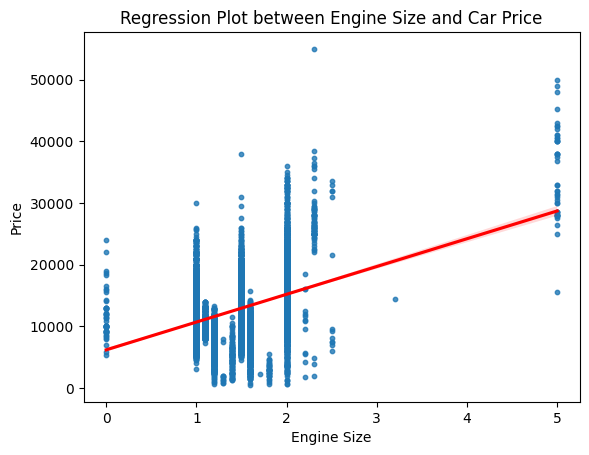

In [17]:
sns.regplot(x='engineSize', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add title and labels
plt.title("Regression Plot between Engine Size and Car Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# Show the plot
plt.show()


## Model Development and Evaluation
Write prompts that generate codes to perform the following actions.

1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.
> Write a python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model.

R² value: 0.1693
Mean Squared Error (MSE): 18633727.3535


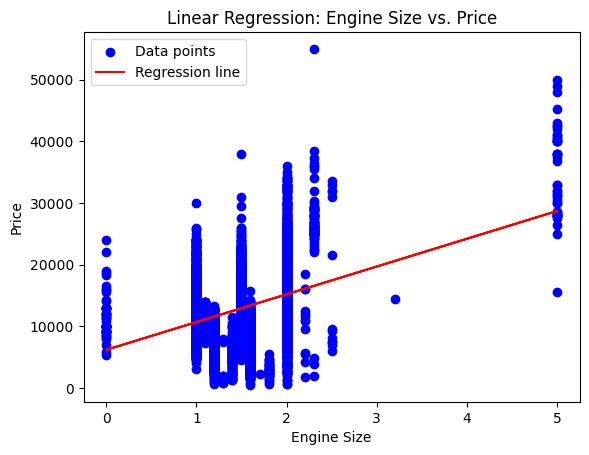

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['engineSize']]  # Source variable(s) (independent variable)
y = df['price']        # Target variable (dependent variable)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions on the same input data
y_pred = model.predict(X)

# Calculate R² (coefficient of determination)
r2 = r2_score(y, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred)

# Output the results
print(f"R² value: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Optionally, plot the regression line with the scatter plot
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line
plt.title("Linear Regression: Engine Size vs. Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.legend()
plt.show()

2. Fit a linear regression model to predict the price using the following set of features.
year, mileage, tax, mpg and engineSize.
Calculate the R^2 and MSE values for this model.

> Write a python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model.


In [20]:
X = df[['engineSize', 'mileage', 'tax']]  # Source variables (multiple independent variables)
y = df['price']  # Target variable (dependent variable)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² (coefficient of determination)
r2 = r2_score(y, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred)

# Output the results
print(f"R² value: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Optional: Display the coefficients (weights) for each feature
print("Model coefficients:", model.coef_)

R² value: 0.5922
Mean Squared Error (MSE): 9148013.2076
Model coefficients: [ 5.59694940e+03 -1.46307153e-01  1.19658377e+01]


3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

```
Write a python code that can perform the following tasks.
1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model.
```

In [23]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline  # Ensure this import is present
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df[['engineSize', 'mileage', 'tax']]  # Source variables (independent variables)
y = df['price']  # Target variable (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that standardizes, adds polynomial features, and fits the linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('poly_features', PolynomialFeatures(degree=2)),  # Add second degree polynomial features
    ('model', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R² (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print(f"R² value: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R² value: 0.6315
Mean Squared Error (MSE): 8262024.9489


4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%.
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

```
Write a python code that can perform the following tasks.
1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
```

In [25]:
from sklearn.linear_model import Ridge

X = df[['engineSize', 'mileage', 'tax']]  # Source attributes (independent variables)
y = df['price']  # Target attribute (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with a regularization parameter alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge regression model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate R² (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print(f"R² value: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R² value: 0.5985
Mean Squared Error (MSE): 9001755.4914


5. Perform a second order polynomial transform on both the training data and testing data created for the question above.
Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

```
Write a python code that can perform the following tasks.
1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
```

In [28]:

# Seleccionar las variables independientes (atributos fuente) y la variable dependiente (atributo objetivo)
X = df[['engineSize', 'mileage', 'tax']]  # Atributos fuente (variables independientes)
y = df['price']  # Atributo objetivo (variable dependiente)

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Transformar el conjunto de prueba

# Crear el objeto PolynomialFeatures para aplicar características polinómicas de segundo grado
poly = PolynomialFeatures(degree=2)

# Ajustar y transformar las características de entrenamiento
X_train_poly = poly.fit_transform(X_train_scaled)

# Transformar las características de prueba (sin ajuste)
X_test_poly = poly.transform(X_test_scaled)

# Crear el modelo de Ridge con un parámetro de regularización alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Ajustar el modelo con los datos de entrenamiento transformados
ridge_model.fit(X_train_poly, y_train)

# Realizar predicciones con el conjunto de prueba transformado
y_pred = ridge_model.predict(X_test_poly)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# Calcular MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)

# Mostrar los resultados
print(f"R² value: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R² value: 0.6315
Mean Squared Error (MSE): 8262022.2977


## In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

```
Write a python code that can perform the following tasks.
1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.
```

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Seleccionar las variables de entrada (atributos fuente) y la variable de salida (atributo objetivo)
X = df[['engineSize', 'mileage', 'tax']]  # Atributos fuente (variables independientes)
y = df['price']  # Atributo objetivo (variable dependiente)

# Step 2: Dividir los datos en entrenamiento y prueba (80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Escalar las características con StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Step 4: Aplicar características polinómicas de segundo grado (degree=2)
poly = PolynomialFeatures(degree=2)

# Ajustar y transformar el conjunto de entrenamiento
X_train_poly = poly.fit_transform(X_train_scaled)

# Transformar el conjunto de prueba (sin ajuste)
X_test_poly = poly.transform(X_test_scaled)

# Step 5: Configurar la búsqueda de Grid Search con validación cruzada para encontrar el mejor valor de alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Varios valores para alpha en Ridge

ridge_model = Ridge()  # Modelo de Ridge

# Usar GridSearchCV para buscar el mejor valor de alpha
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train_poly, y_train)

# Obtener el mejor modelo con el mejor alpha
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Step 6: Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(X_test_poly)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# Calcular MSE (Error Cuadrático Medio)
mse = mean_squared_error(y_test, y_pred)

# Imprimir los resultados
print(f"Mejor alpha de Grid Search: {best_alpha}")
print(f"Valor de R²: {r2:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

Mejor alpha de Grid Search: 1
Valor de R²: 0.6315
Error Cuadrático Medio (MSE): 8261998.6284


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
